In [1]:
import numpy as np 
from scipy.constants import G
import matplotlib.pyplot as plt

# Sympletic Integrator

\begin{align*}
x_{i+1} &= q_i + c_i \frac{p_{i+1}}{m}t \\
v_{i+1} &= v_i + d_i F(q_i)t
\end{align*}

Update the position $i$ of the particle by adding to it its (previously updated) velocity $i$ multiplied by $ c_{i}$

Update the velocity $i$ of the particle by adding to it its acceleration (at updated position) multiplied by $ d_{i}$

## First Order
$k=1$

$c_1 = d_1 = 1$

## Second Order
$k=2$

$c_1=0, \, c_2=1, \, d_1=d_2=\frac12$

## Third Order 
$k=3$

$c_1=1, \, c_2=-\frac23, \, c_3 = \frac23, \, d_1=-\frac1{24}, \, d_2=\frac34, \, d_3=\frac7{24}$

## Fourth Order
$k=4$

$c_1=c_4=\frac{1}{2(2-2^{1/3})}, \, c_2=c_3=\frac{1-2^{1/3}}{2(2-2^{1/3})}, \, d_1=d_3=\frac{1}{2(2-2^{1/3})}, \, d_2=-\frac{2^{1/3}}{2(2-2^{1/3})}, d_4=0$


In [2]:
# 3-body: Earth, Sun 1, & Sun 2

# An array of the position of both x-axis and y-axis of the 3-body
px = np.array([0.00e00, 0.00e00, 0.00e00])
py = np.array([0.00e00, 4.50e10, -4.50e10])

# An array of the velocity of both x-axis and y-axis of the 3-body
vx = np.array([0.05e04, 3.00e04, -3.00e04])
vy = np.array([0.00e00, 0.00e00, 0.00e00])

#An array of the mass of the 3-body
m = np.array([5.974e24, 1.989e30, 1.989e30])

Solve with SciPy

\begin{align*}
r' &= v\\
v' &= -f(r)r^{-1} \textbf{r}
\end{align*} 

In [3]:
from scipy.integrate import solve_ivp

diff_eq = [lambda x, v, t: x, lambda x, v, t: v]

In [4]:
m = np.array([1.9891e30,5.97219e24,7.34767309e22])
r=np.array([[149600000.,0.],[1.,0.],[0.,384400.]])
v=np.array([[0.,0.],[0.,1.],[1.,0.]])


dt=.001
t_max=1000

def calc_forces(r,m,G):
  N=len(m)
  forces = np.zeros((N,2))
  for i in range(N):
    for j in range(i+1,N):
      distance = np.linalg.norm(r[i]-r[j])
      force = G* m[i]*m[j]/ distance**2
      direction = (r[j]-r[i]/distance)
      forces[i]+= force*direction
      forces[j]-= force*direction
    return forces
  
t=0

body_0 = []
body_1 = []
body_2 = []

while t<t_max:
  forces = calc_forces(r,m,G)
  a= forces / m.reshape(-1,1)
  v+=a*dt
  r+=v*dt
  t+= dt
  body_0.append([t, r[0, 0], r[0, 1]])
  body_1.append([t, r[1, 0], r[1, 1]])
  body_2.append([t, r[2, 0], r[2, 1]])

body_0 = np.array(body_0)
body_1 = np.array(body_1)
body_2 = np.array(body_2)

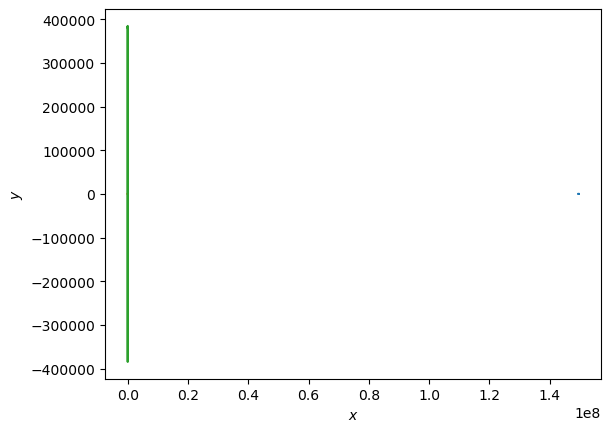

In [5]:
plt.plot(body_0[:, 1], body_0[:, 2])
plt.plot(body_1[:, 1], body_1[:, 2])
plt.plot(body_2[:, 1], body_2[:, 2])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

# RK4

In [6]:
import scipy as sci
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [7]:
m_Earth = 5.9722e24 # kg
m_Sun = 1.989e+30 # kg
r_AU = 149597870700 # m
v_Earth = 29.78e3 # m/s
t_Earth = 60*60*24*365 # s

In [8]:
def plot_orbits(orbits):
  #Create figure
  fig=plt.figure(figsize=(15,15))

  #Create 3D axes
  ax=fig.add_subplot(111, projection="3d")

  #Plot the orbits
  for orbit in orbits:
    ax.plot(orbit[:, 0], orbit[:, 1], orbit[:, 2])

  #Plot the final positions of the stars
  for orbit in orbits:
    ax.scatter(orbit[-1,0], orbit[-1,1], orbit[-1,2], marker="o", s=100)

  #Add a few more bells and whistles
  ax.set_xlabel("x-coordinate", fontsize=14)
  ax.set_ylabel("y-coordinate", fontsize=14)
  ax.set_zlabel("z-coordinate", fontsize=14)
  ax.set_title("Visualization of orbits of stars in a n-body system\n", fontsize=14)

  return fig

In [9]:
from matplotlib.animation import FuncAnimation
import IPython.display as dsp
from base64 import b64encode

def play_video(name):
  # use this fix to display mp4 since Colab can't do it with display.Video
  # https://stackoverflow.com/questions/57377185/how-play-mp4-video-in-google-colab
  mp4 = open(name,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  
  return dsp.HTML("""
  <video width=400 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url)

def create_animation(name, orbits, times):
  """
  display interactive animation of orbits. 
  
  name: filename of the saved animation
  orbits: array-like of n time series, each time series a t_list * 3 size matrix
  times: array-like of t_list * 1 of time
  """

  #Create figure
  fig=plt.figure(figsize=(7,7))

  #Create 3D axes
  ax=fig.add_subplot(111, projection="3d")

  def animate(frame):
    ax.clear()

    ax.text(0.7, 0.7, 0.7, f"t={times[frame]:.3f}", transform=ax.transLimits)

    # Plot the orbits
    for i, orbit in enumerate(orbits):
      ax.plot(orbit[:frame, 0], orbit[:frame, 1], orbit[:frame, 2])

    # Plot the final positions of the stars
    for orbit in orbits:
      ax.scatter(orbit[frame-1,0], orbit[frame-1,1], orbit[frame-1,2], marker="o", s=100)


  desired_num = 250
  frame_num = len(orbits[0])
  scaling = int(np.ceil(frame_num / desired_num))
  # print(f"range(0, {frame_num}, {scaling})")
  anim = FuncAnimation(fig, animate, frames=range(0, frame_num, scaling))

  anim.save(name, codec=None)

In [10]:
def nbody(r, v, m, time_span, m_norm=1.989e+30, r_norm=1.495978707e11, v_norm=29784.8, t_norm=60*60*24*365):
  init_params = np.array([r, v]).flatten()

  # Net constants
  K1=G*t_norm*m_norm/(r_norm**2*v_norm)
  K2=v_norm*t_norm/r_norm

  def NBodyEquations(w, t, m):
    n = len(m)
    
    r = [w[3*i:3*i+3] for i in range(n)]
    v = [w[3*i+3*n:3*i+3+3*n] for i in range(n)]

    r_mn = np.array([[np.linalg.norm(r[i] - r[j]) for i in range(n)] for j in range(n)])

    # print("r_Mn")
    # print(r_mn)
    #r_str = [f"K2*v_{i}" for i in range(len(v))]
    #v_str = [" + ".join([f"K1*m[{j}]*(r[{j}]-r[{i}])/r_mn[{i}][{j}]**3" for j in range(n)  if i != j]) for i in range(n)]
    #print(np.concatenate((r_str, v_str), axis=0).flatten())

    # print(r)
    # print(v)

    drbydt = np.array([K2*v_i for v_i in v])

    #print("dr/dt")
    #print(drbydt) 

    dvbydt = np.array([np.sum([K1*m[j]*(r[j]-r[i])/r_mn[i][j]**3 for j in range(n)  if i != j], axis=0) for i in range(n)])

    #print("dv/dt")
    #print(dvbydt)

    derivs = np.concatenate((drbydt, dvbydt), axis=0).flatten()

    #print(derivs)

    return derivs

  # Run the ODE solver
  n_body_sol=sci.integrate.odeint(NBodyEquations, init_params, time_span, args=((m,)))
  orbits = [n_body_sol[:, 3*i:3*i+3] for i in range(len(m))]

  return orbits

# Simulation: Two Bodies

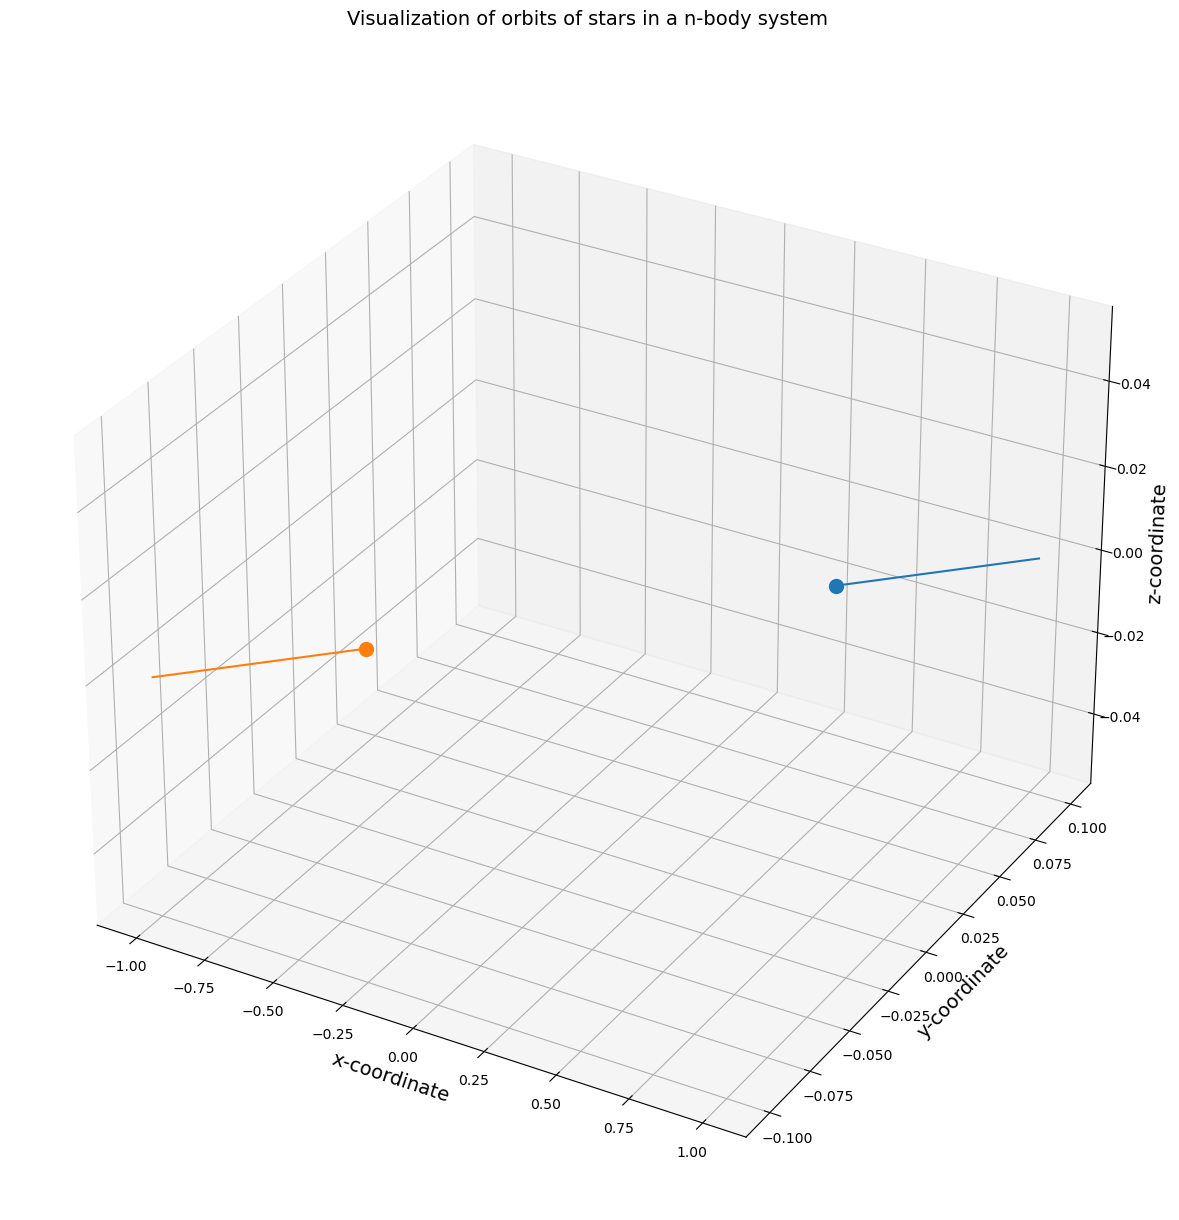

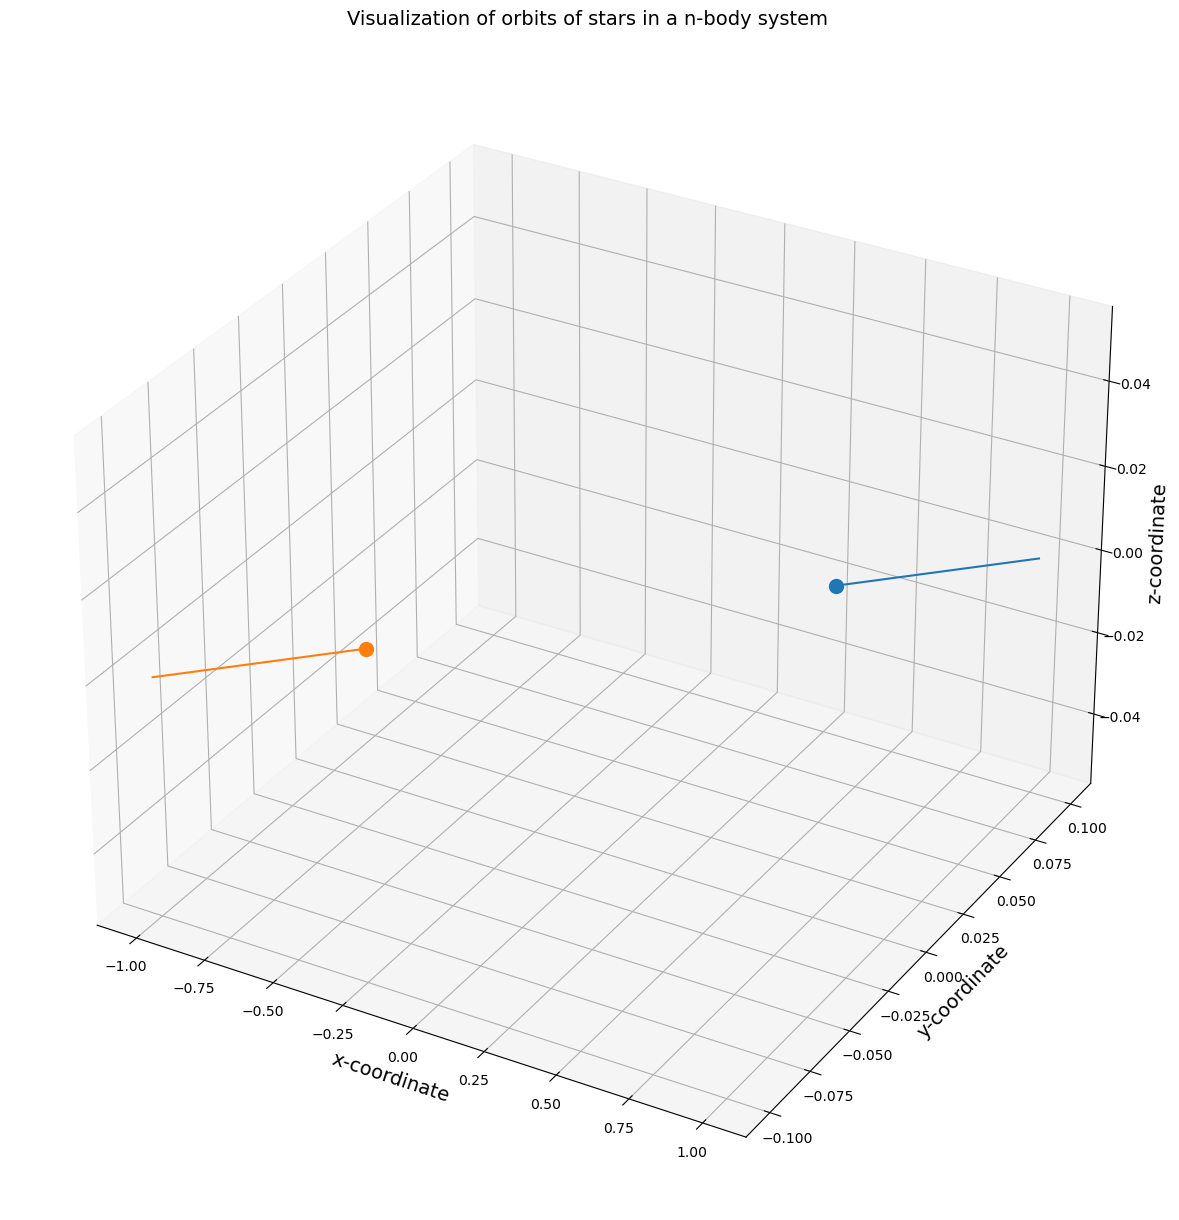

In [11]:
r = np.array([[1, 0.1, 0], [-1, -0.1, 0]], dtype="float64")

v = np.array([[0, 0, 0], [0, 0, 0]], dtype="float64")

m = np.array([10, 10], dtype="float64")

time_span = np.linspace(0, 0.09, 2500)

orbits = nbody(r, v, m, time_span)
plot_orbits(orbits)
#create_animation("two_body.mp4", orbits, time_span)
#play_video("two_body.mp4")

# Simulation: Three Body Chaos

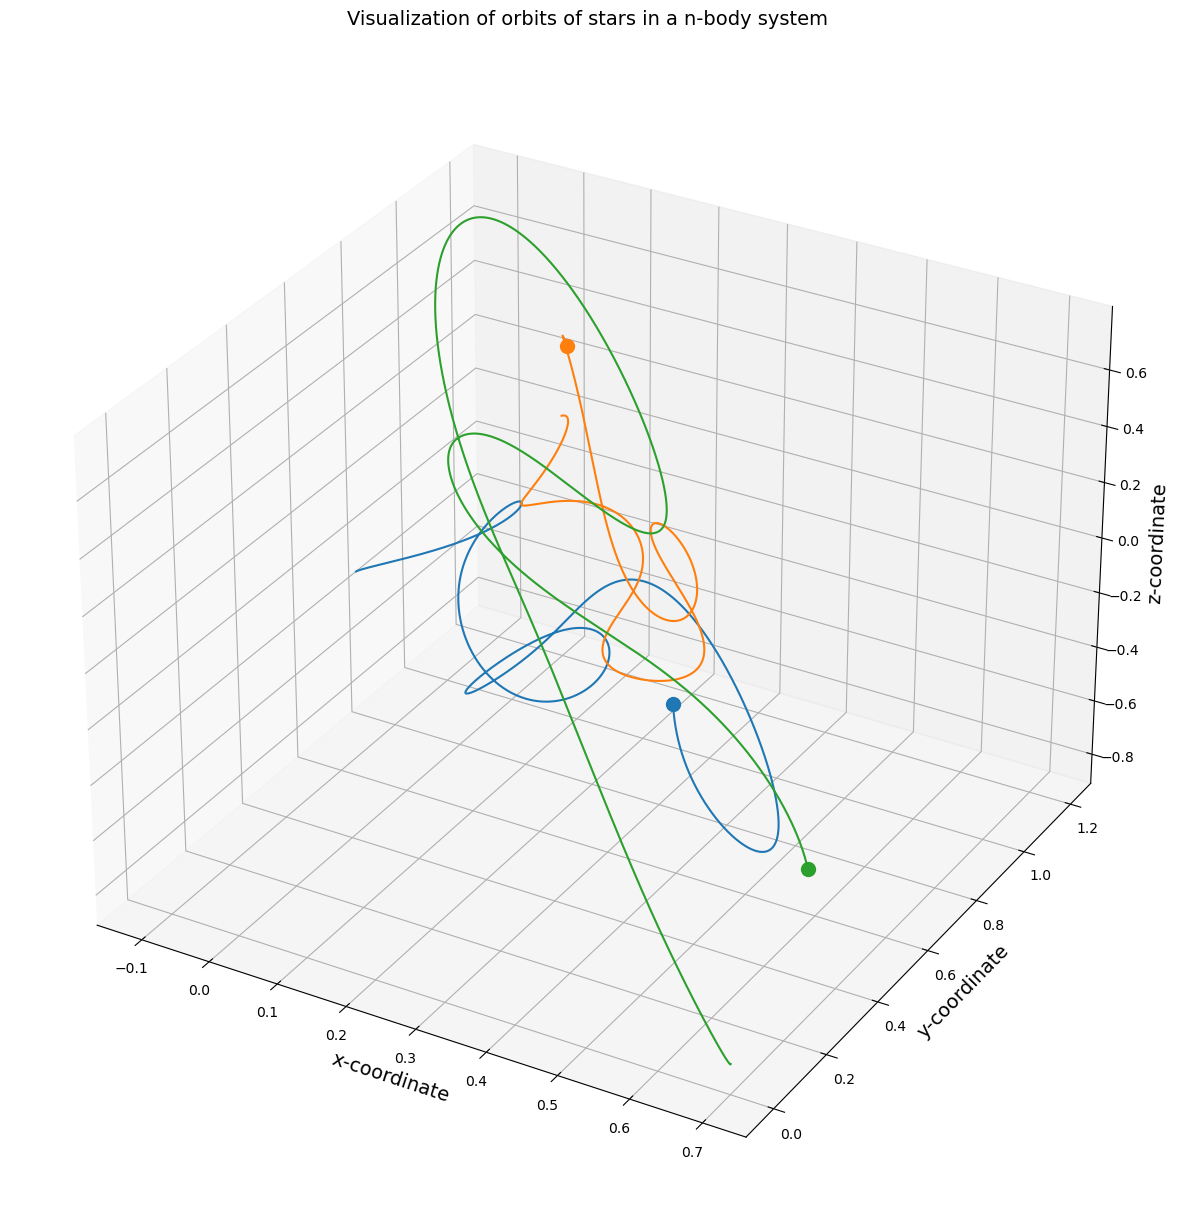

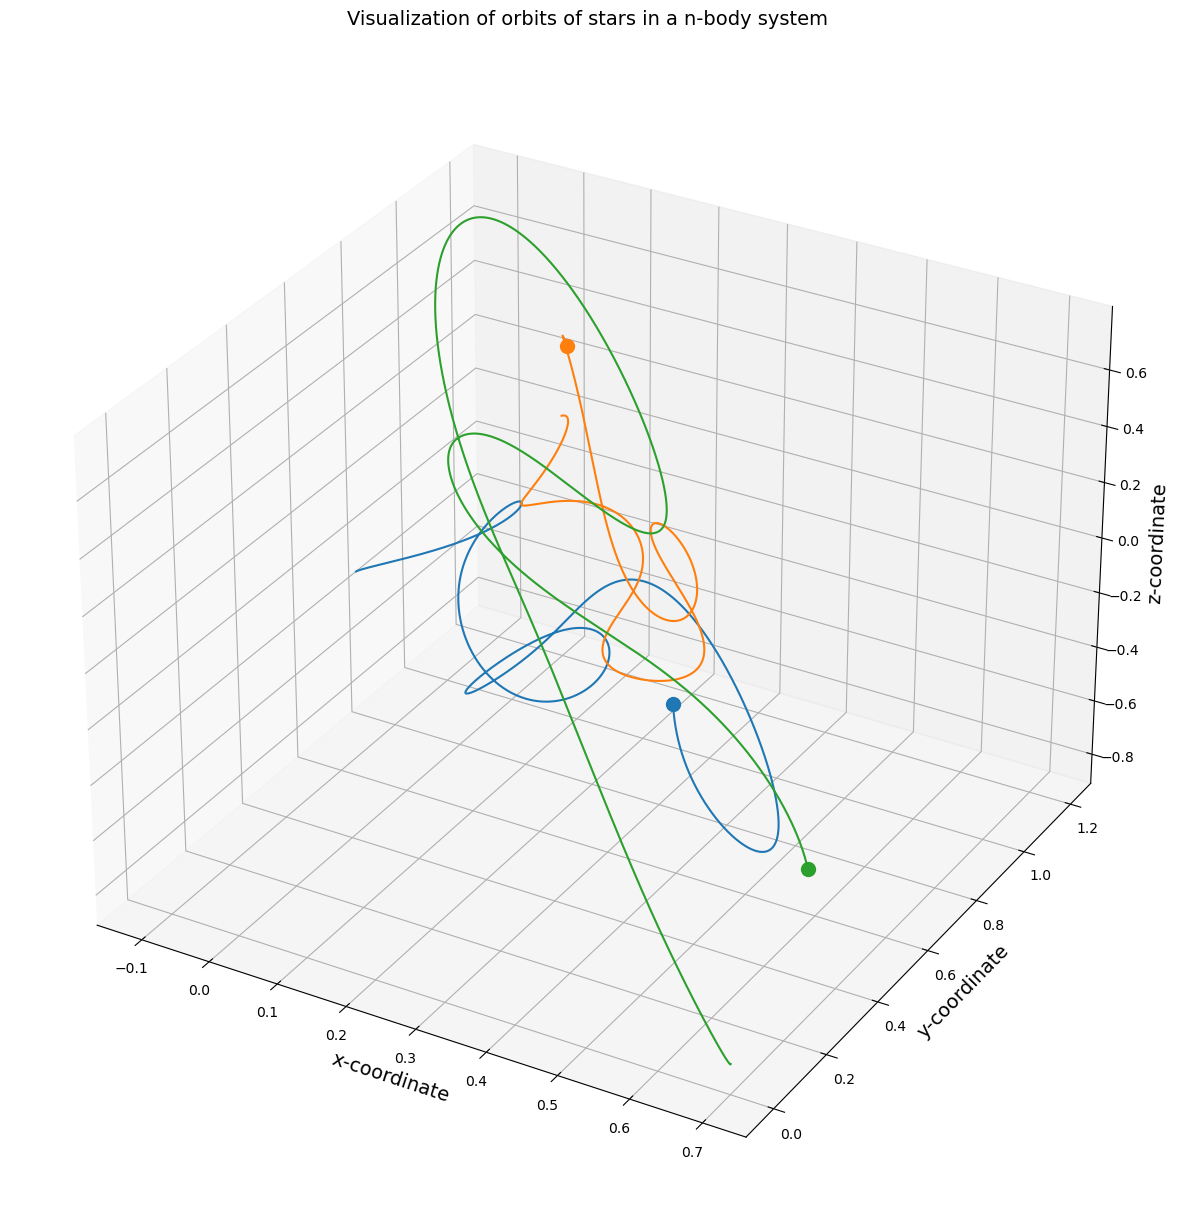

In [12]:
r = np.array([[1, 2, 3],
              [0, 12, 0],
              [7, 0, -8]])*0.1

v = np.array([[1, 2, 2],
              [4, 2, 4],
              [1, -3, -1]])*0.01

m = np.array([0.5, 0.7, 0.3])

time_span=np.linspace(0, 1, 5000)

orbits = nbody(r, v, m, time_span)
plot_orbits(orbits)

# Simulation: Earth & Sun

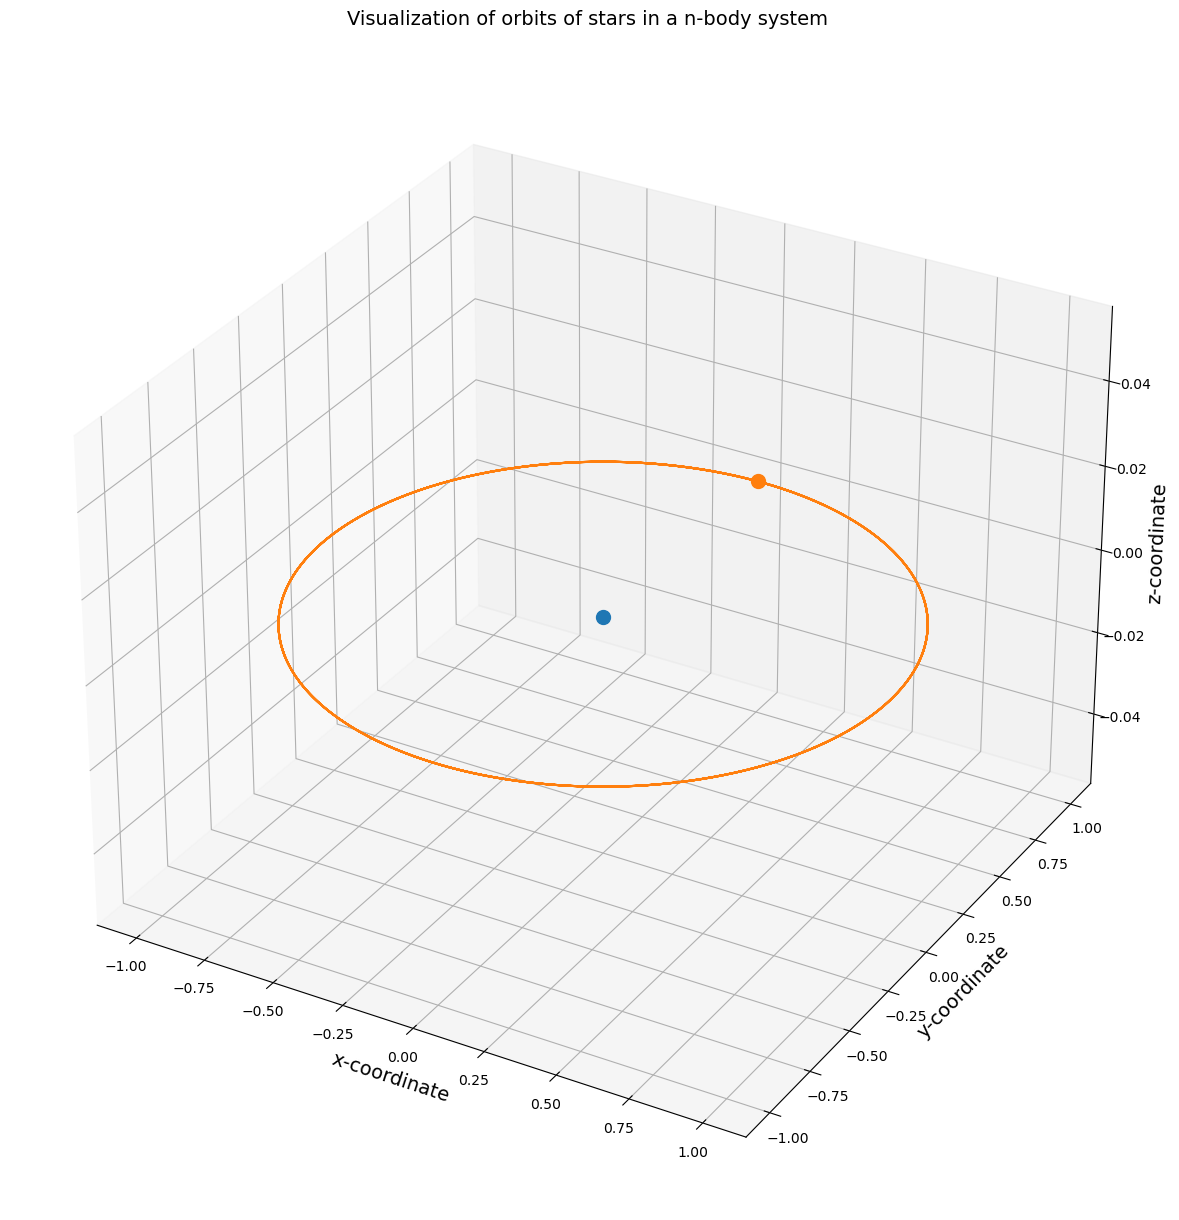

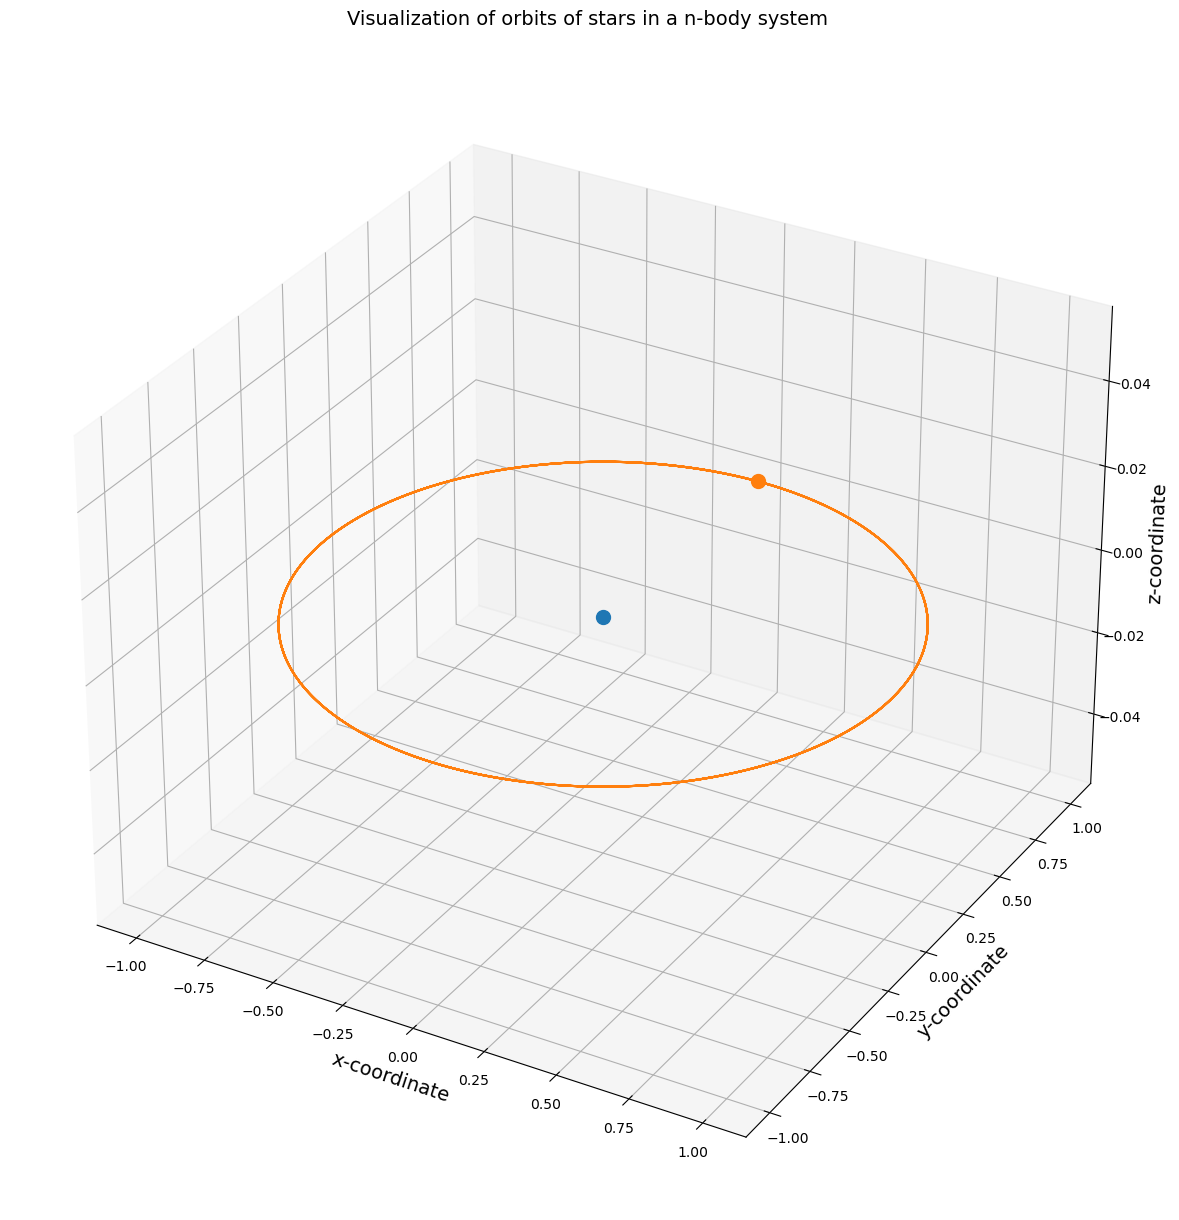

In [13]:
r = np.array([[0, 0, 0],
              [0, 1, 0]], dtype="float64")

v = np.array([[0, 0, 0],
              [1, 0, 0]], dtype="float64")

m = np.array([1, 5.97219e24/1.989e+30])

time_span=np.linspace(0, 5, 10000)

orbits = nbody(r, v, m, time_span)
plot_orbits(orbits)

# Simulation: Drift of RK$ - Normalized

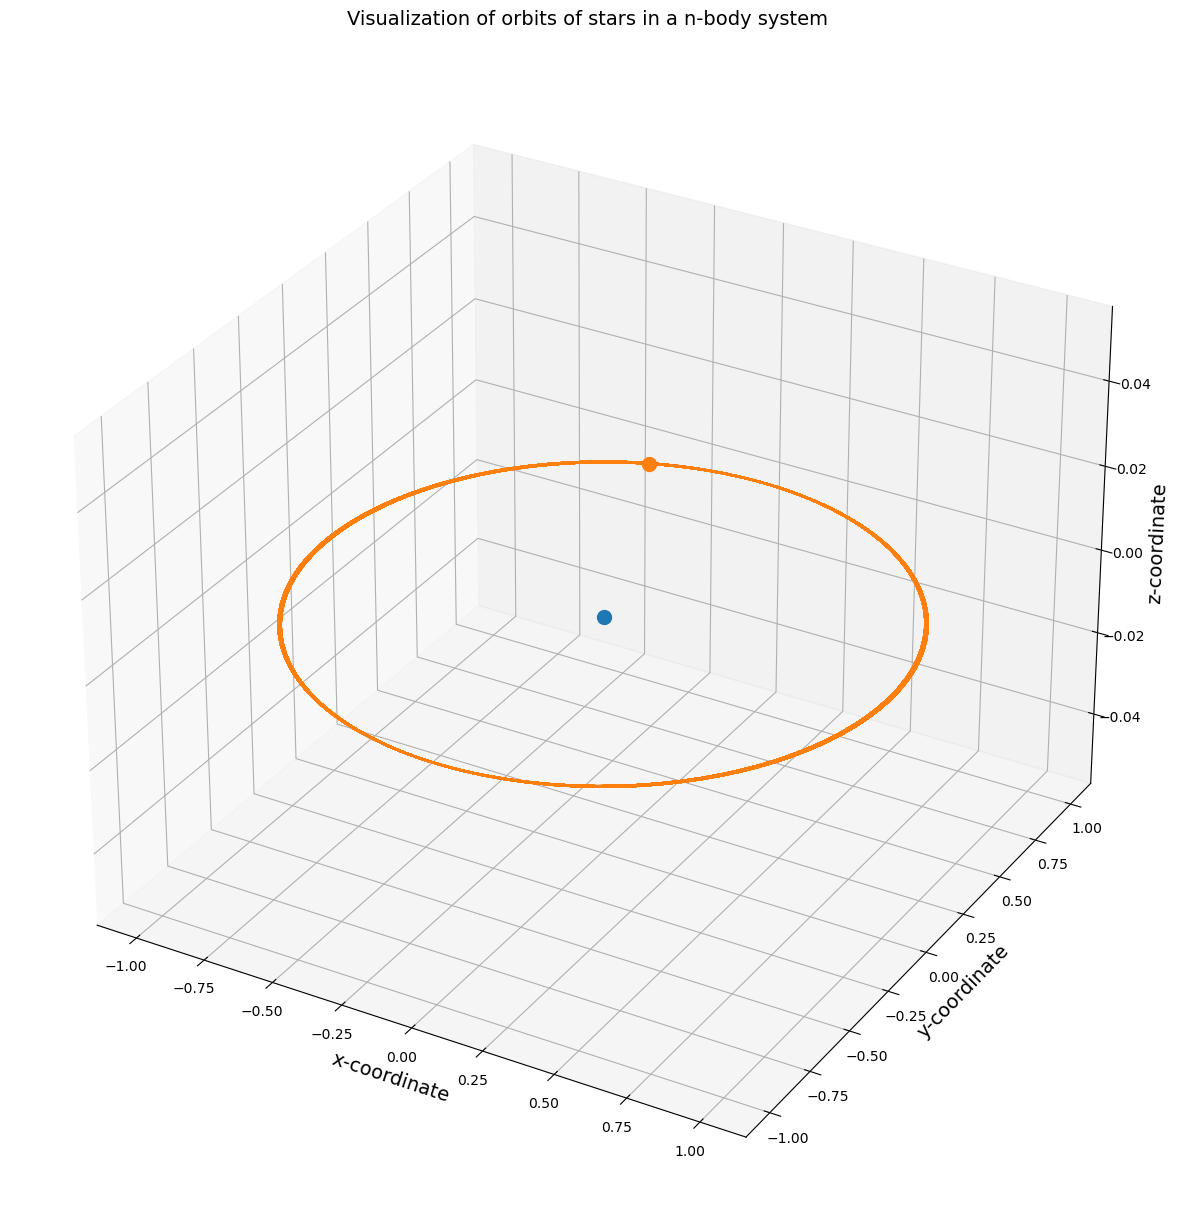

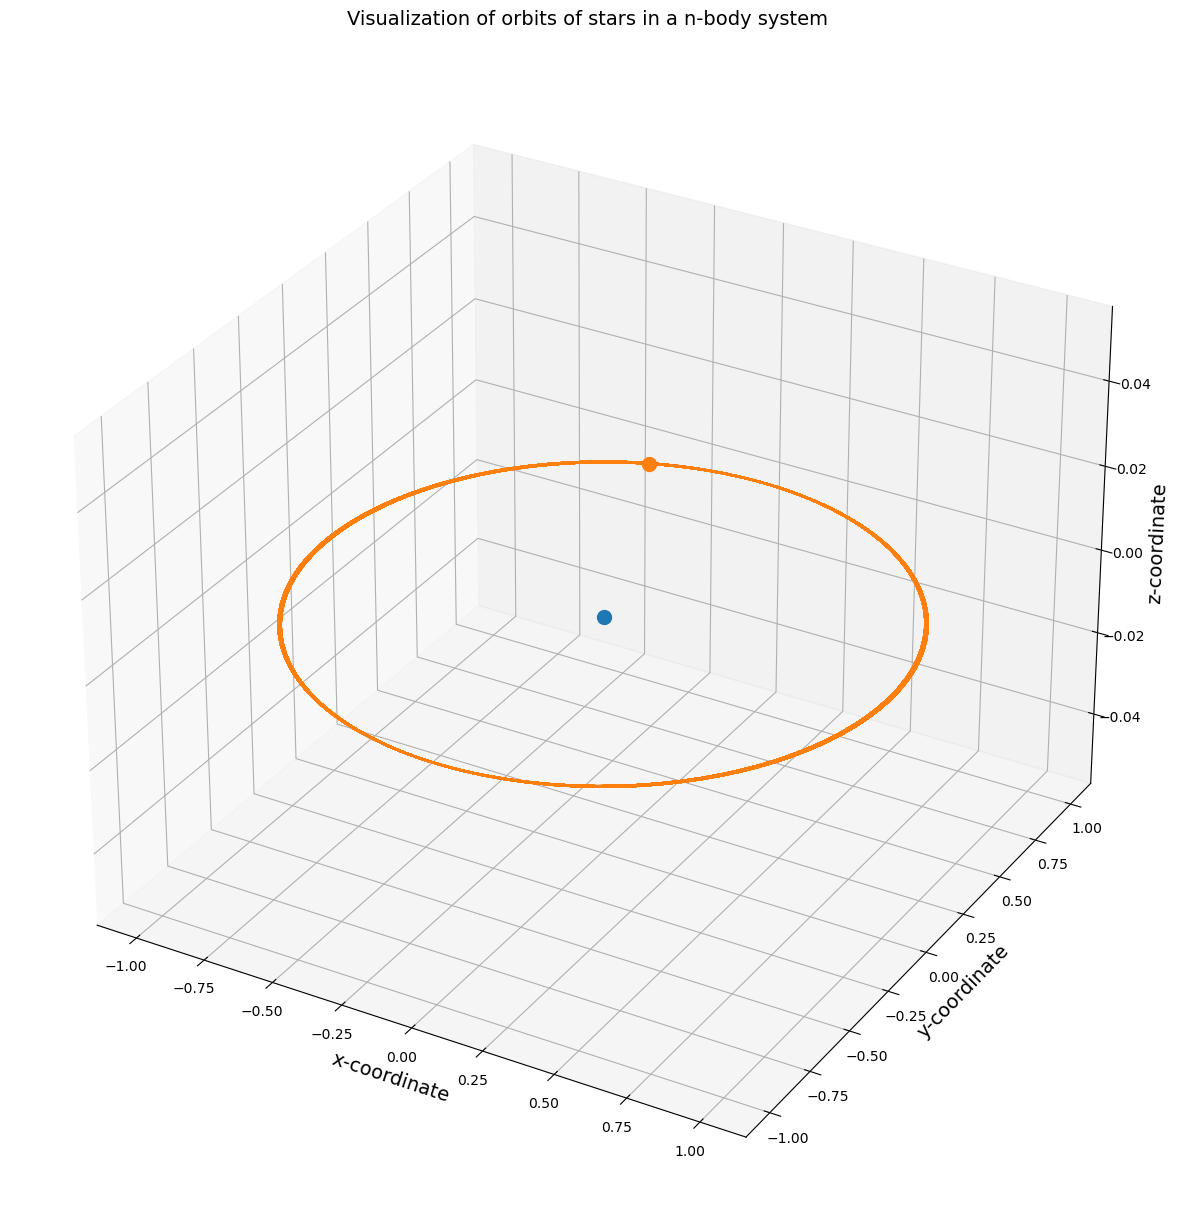

In [14]:
r = np.array([[0, 0, 0],
              [0, 1, 0]], dtype="float64")

v = np.array([[0, 0, 0],
              [1, 0, 0]], dtype="float64")

m = np.array([1, 5.97219e24/1.989e+30])

time_span=np.linspace(0, 500, 50000)

orbits = nbody(r, v, m, time_span)
plot_orbits(orbits)

# Simulation: Drift of RK4 - Unnormalized

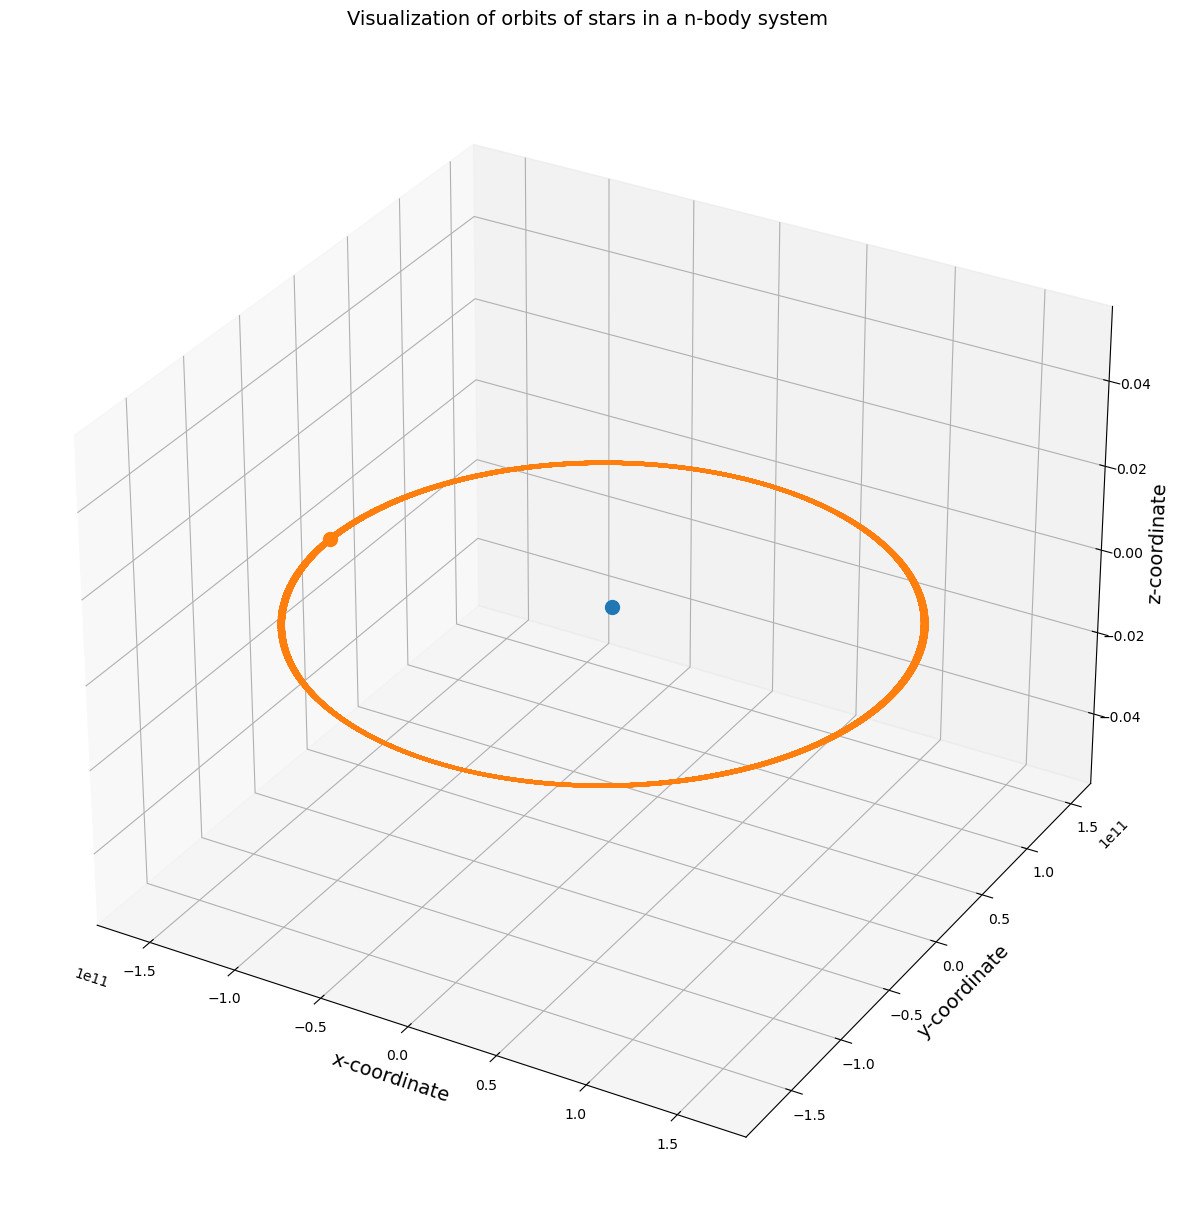

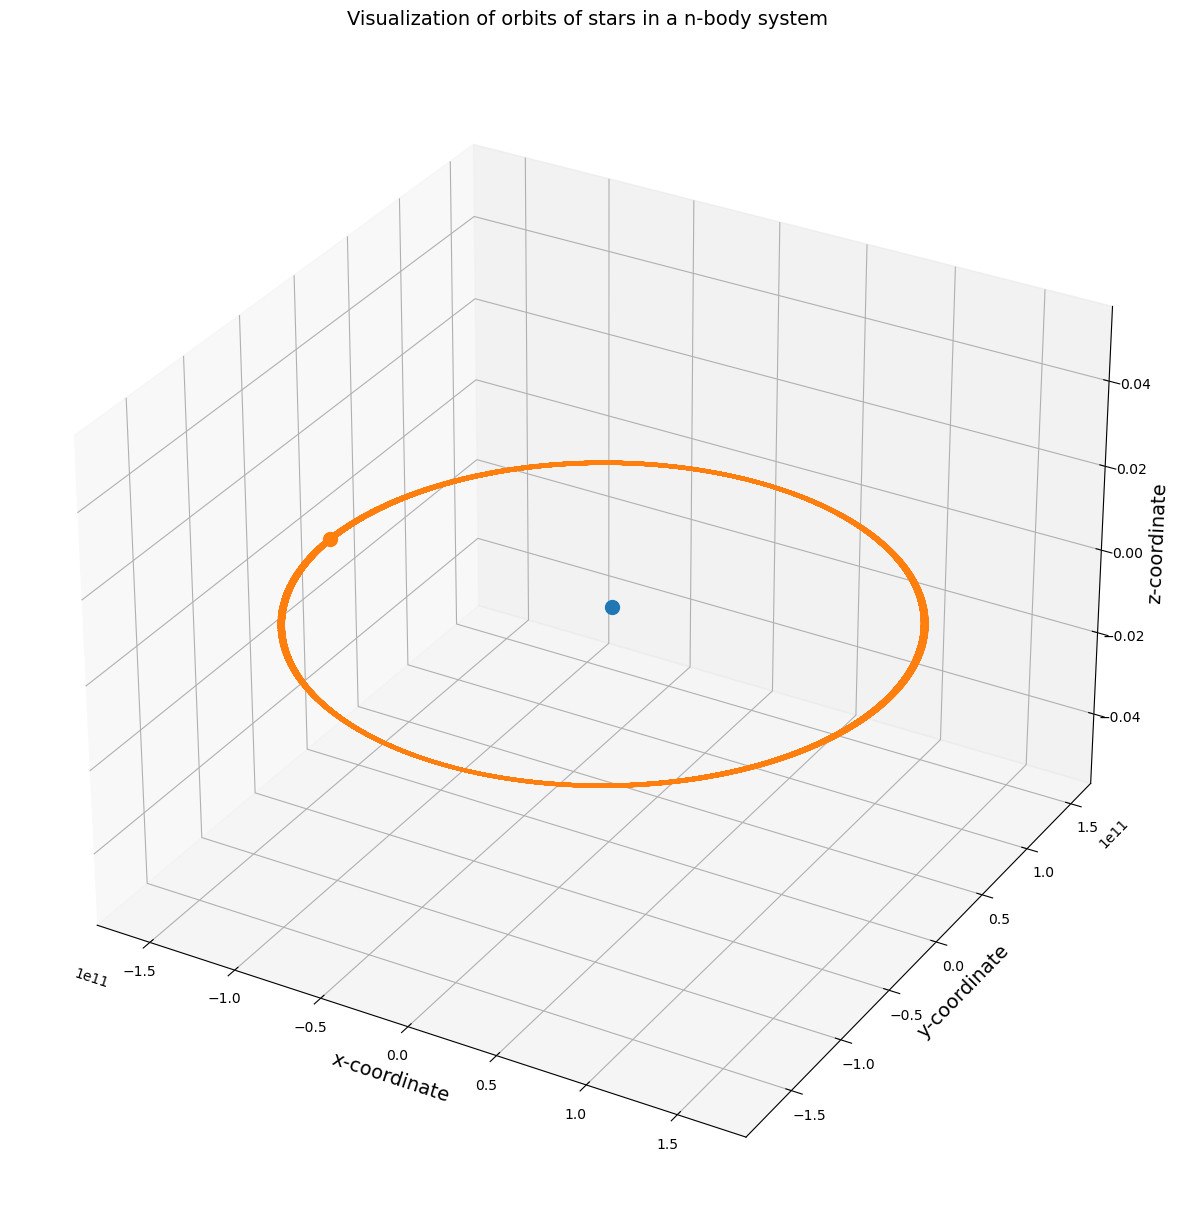

In [15]:
r = np.array([[0, 0, 0],
              [0, r_AU, 0]], dtype="float64")

v = np.array([[0, 0, 0],
              [v_Earth+1000, 390, 0]], dtype="float64")

m = np.array([m_Sun, m_Earth])

time_span = np.linspace(0, 500*t_Earth, 10000)

orbits = nbody(r, v, m, time_span, r_norm=1, m_norm=1, t_norm=1, v_norm=1)
plot_orbits(orbits)

# Simulation: Many Earths

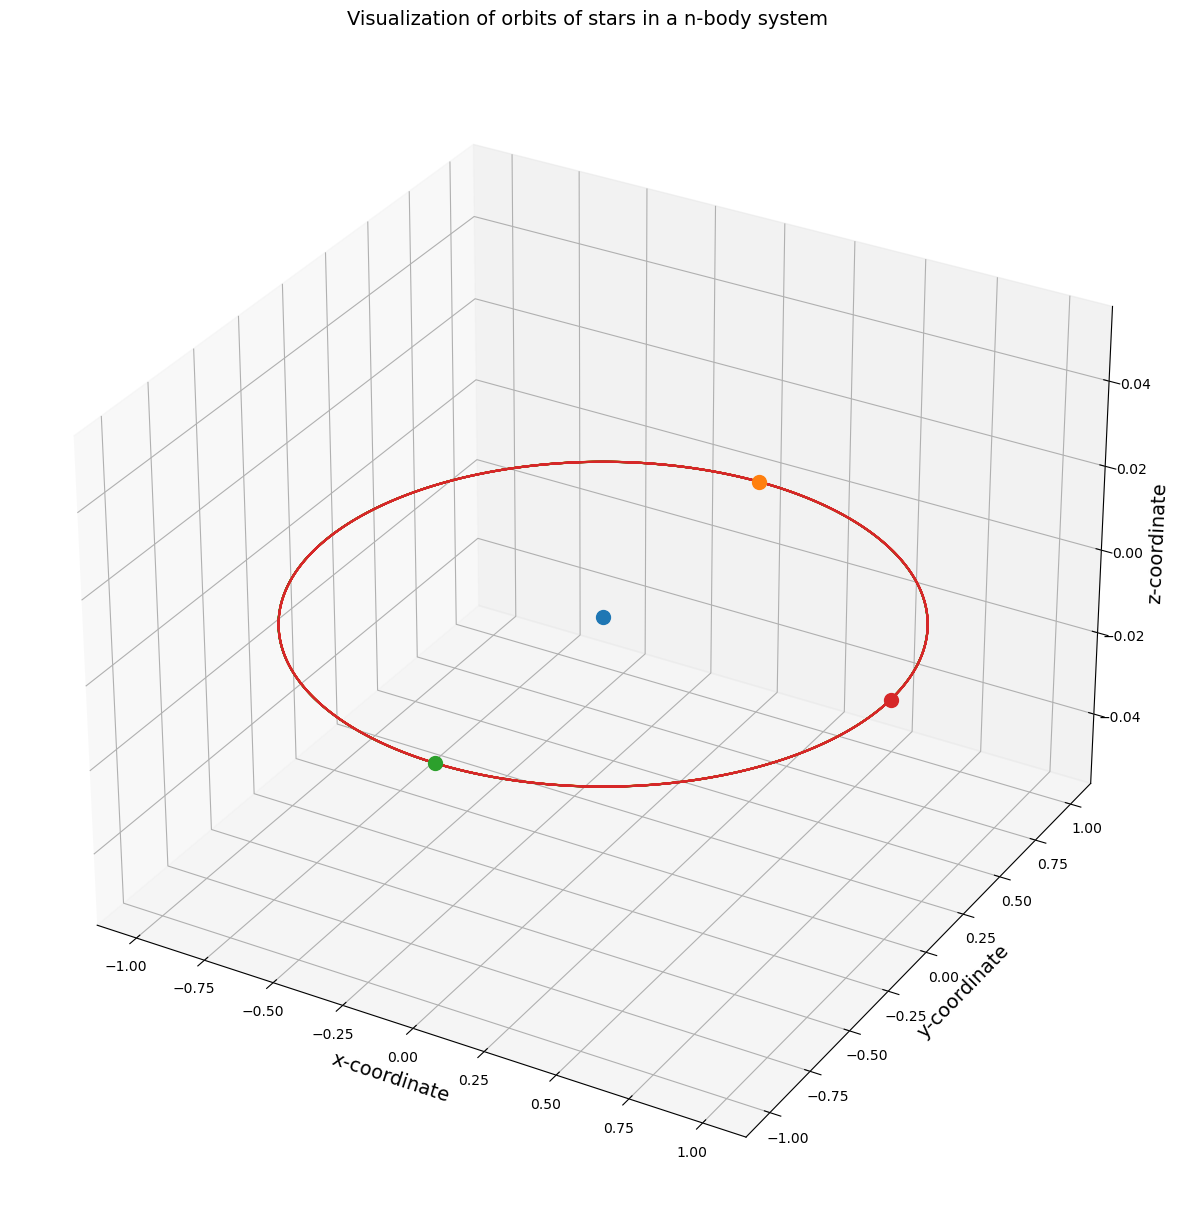

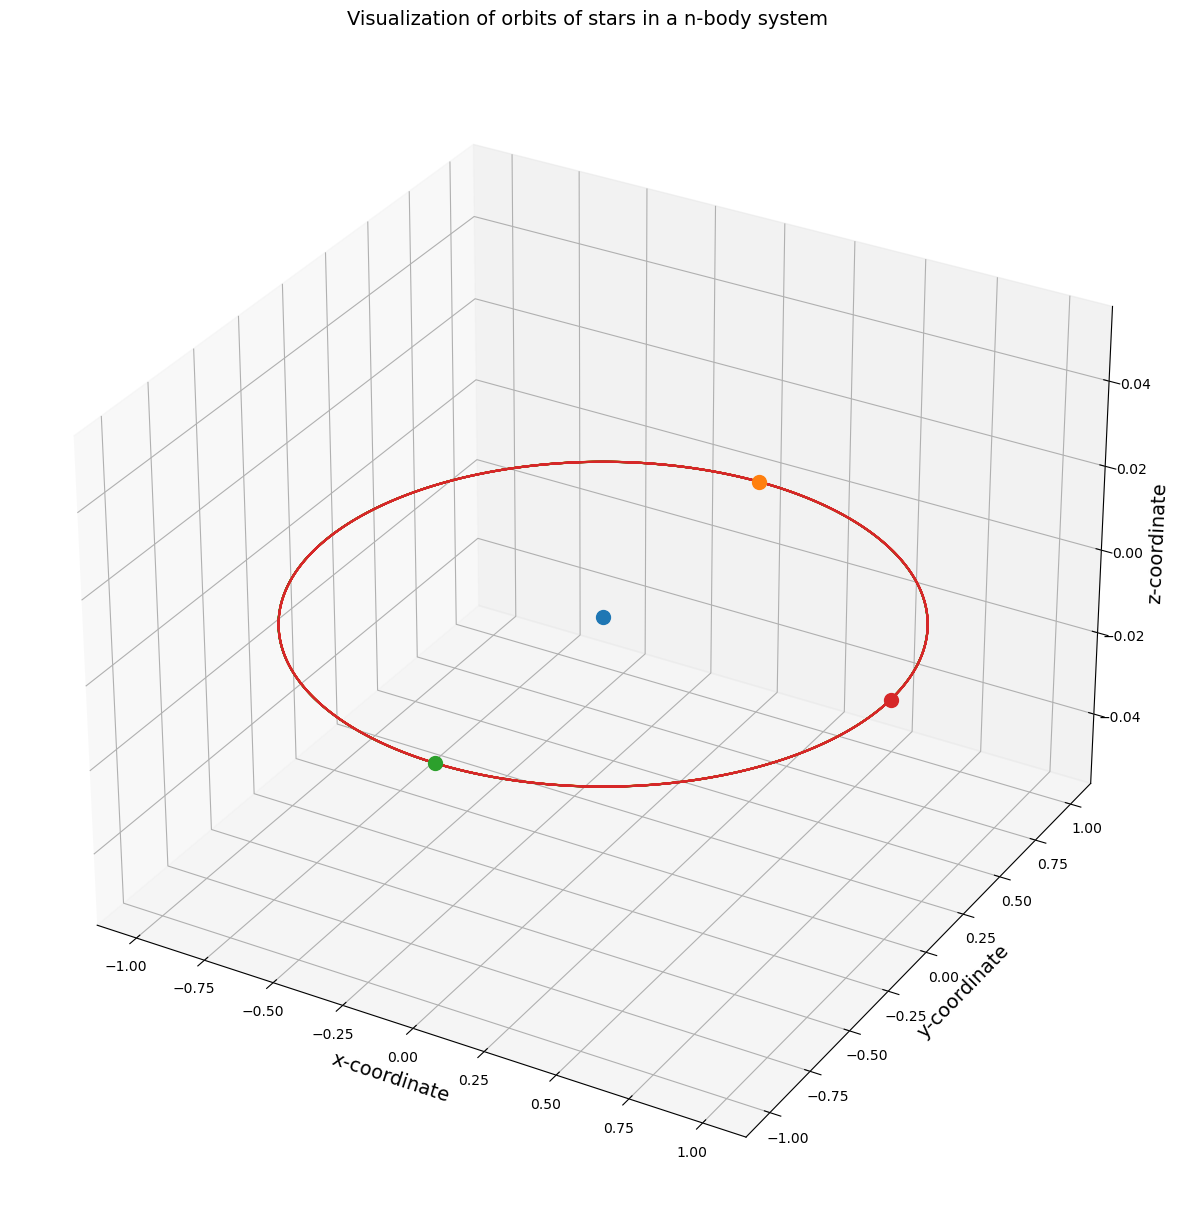

In [16]:
r = np.array([[0, 0, 0],
              [0, 1, 0],
              [0, -1, 0],
              [1, 0, 0]], dtype="float64")

v = np.array([[0, 0, 0],
              [1, 0, 0],
              [-1, 0, 0],
              [0, -1, 0]], dtype="float64")

m = np.array([1, 5.97219e24/1.989e+30, 5.97219e24/1.989e+30, 5.97219e24/1.989e+30])

time_span=np.linspace(0, 3, 50000)

orbits = nbody(r, v, m, time_span)
plot_orbits(orbits)

# Simulation: Lagrange Points

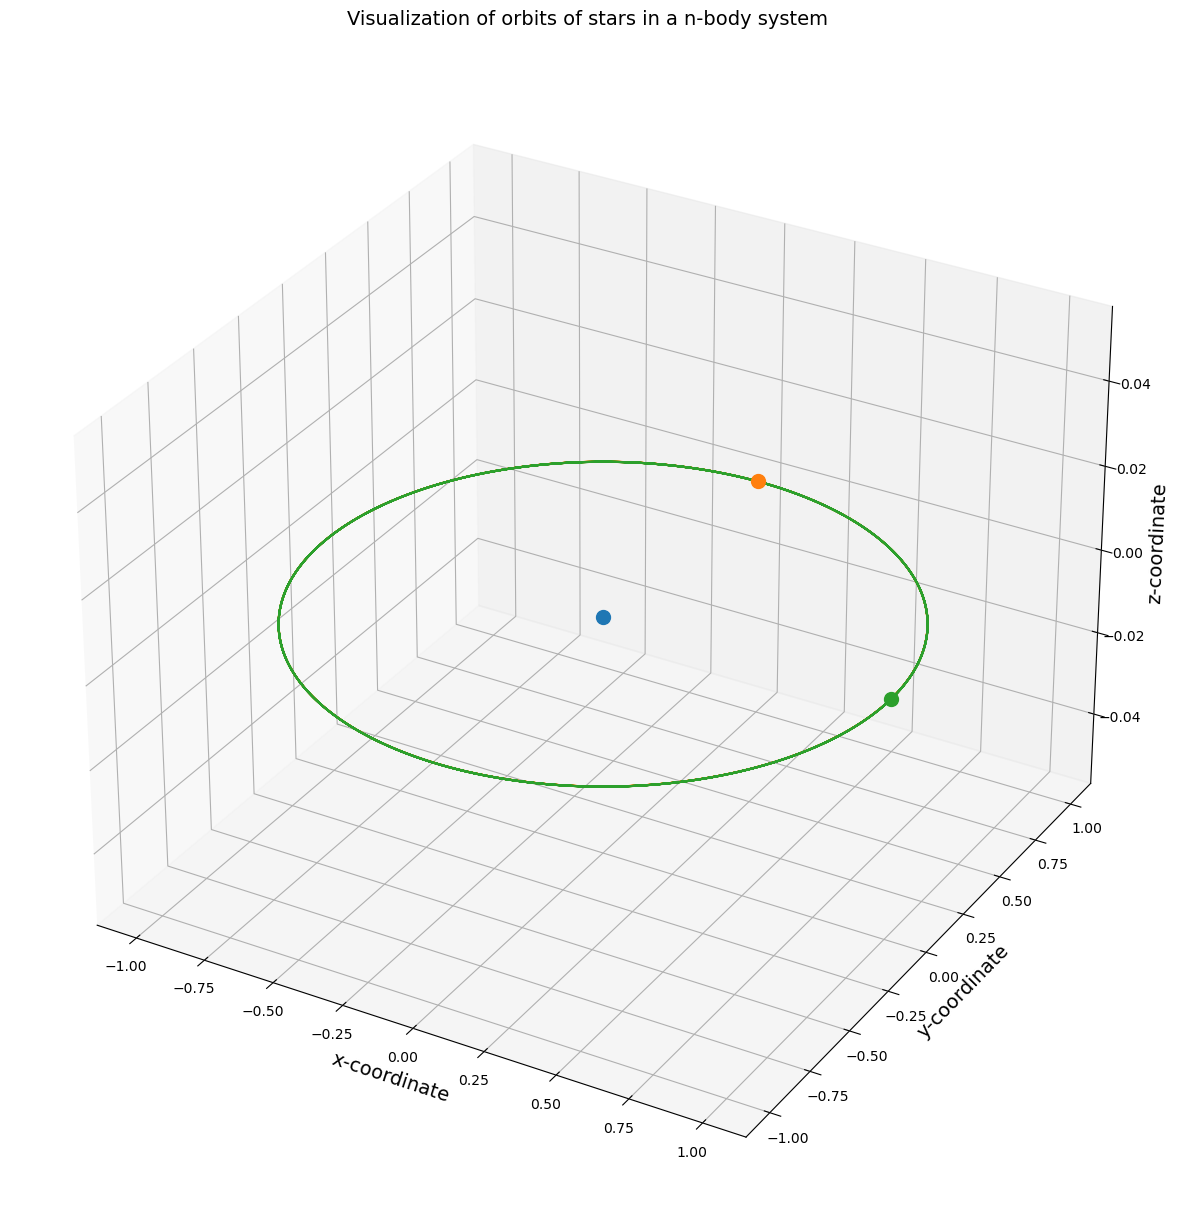

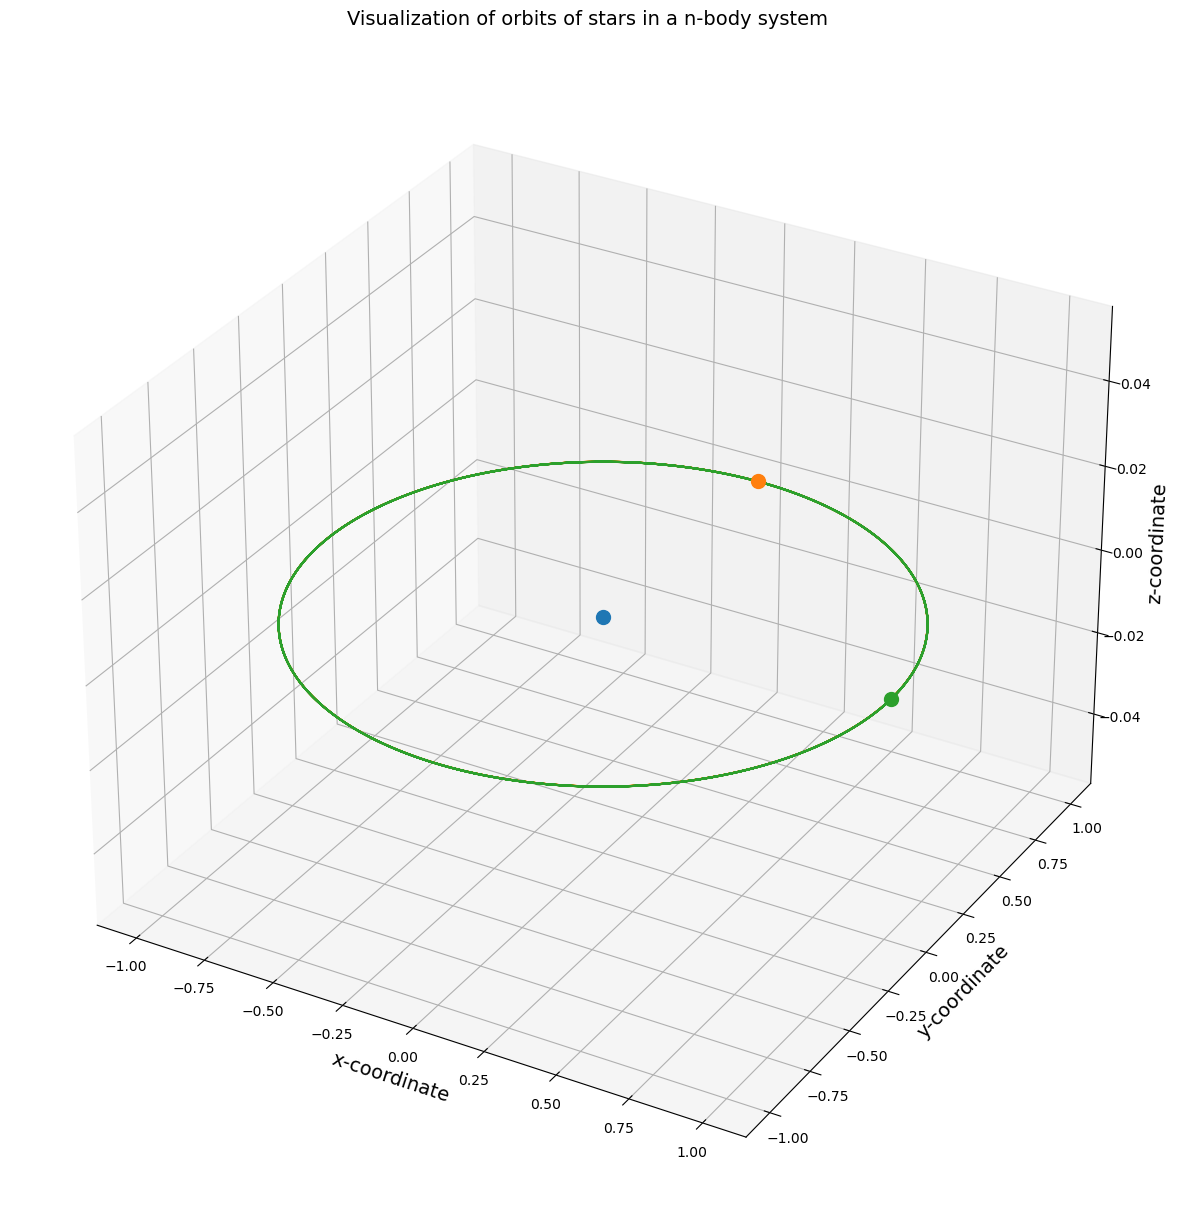

In [17]:
r = np.array([[0, 0, 0],
              [0, 1, 0],
              [1, 0, 0]], dtype="float64")

v = np.array([[0, 0, 0],
              [1, 0, 0],
              [0, -1, 0]], dtype="float64")

m = np.array([m_Sun, m_Earth, 1000]) / m_Sun

time_span=np.linspace(0, 5, 500)

orbits = nbody(r, v, m, time_span)
plot_orbits(orbits)

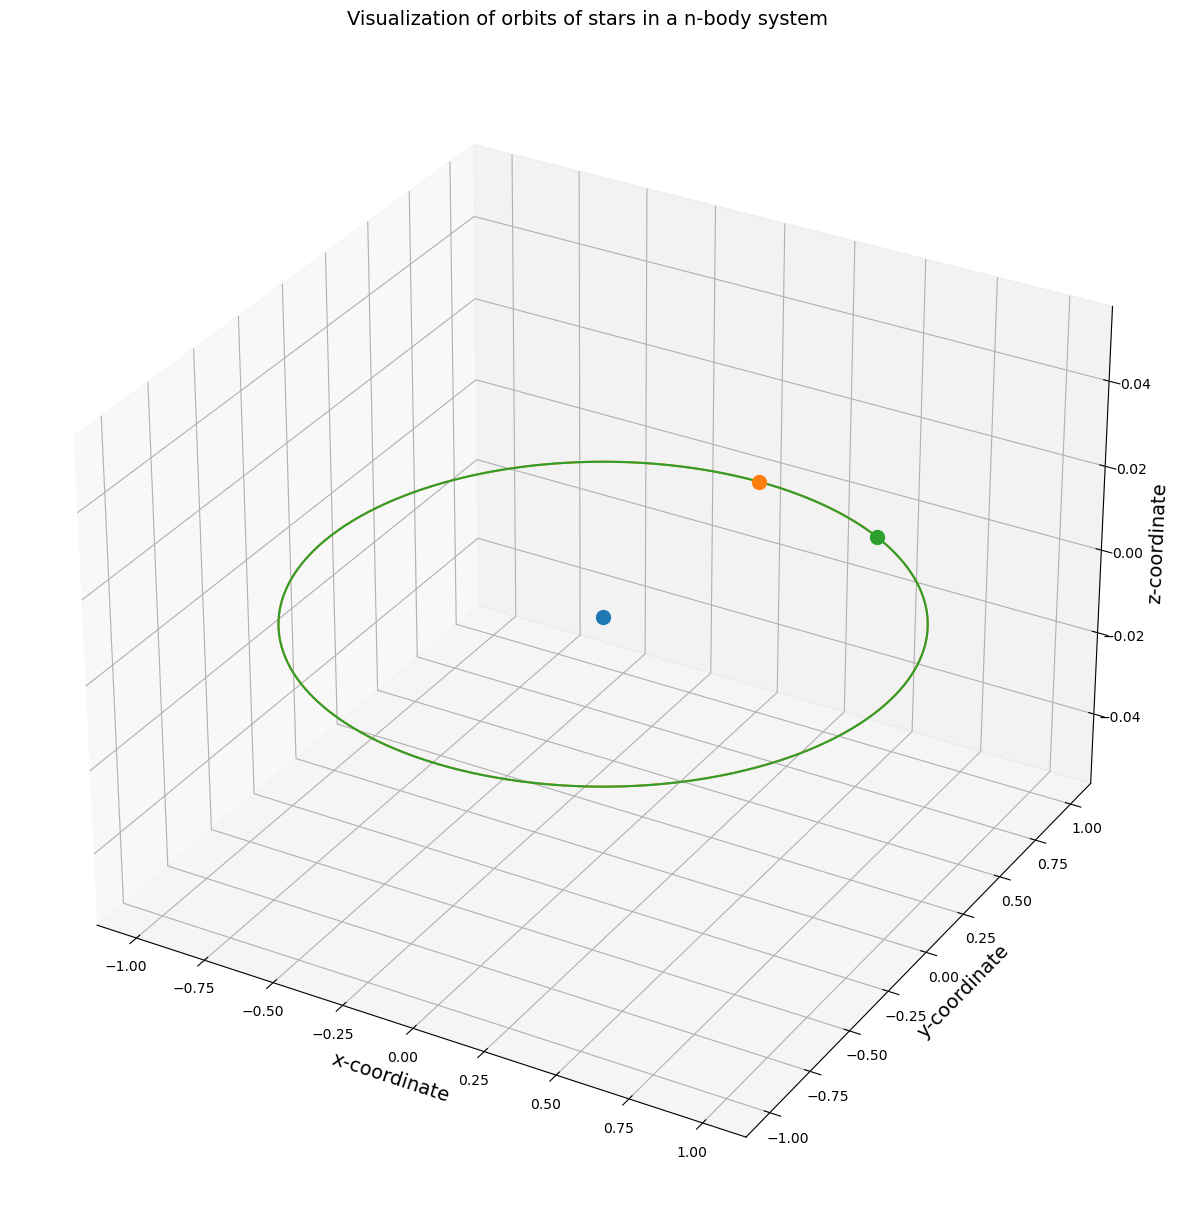

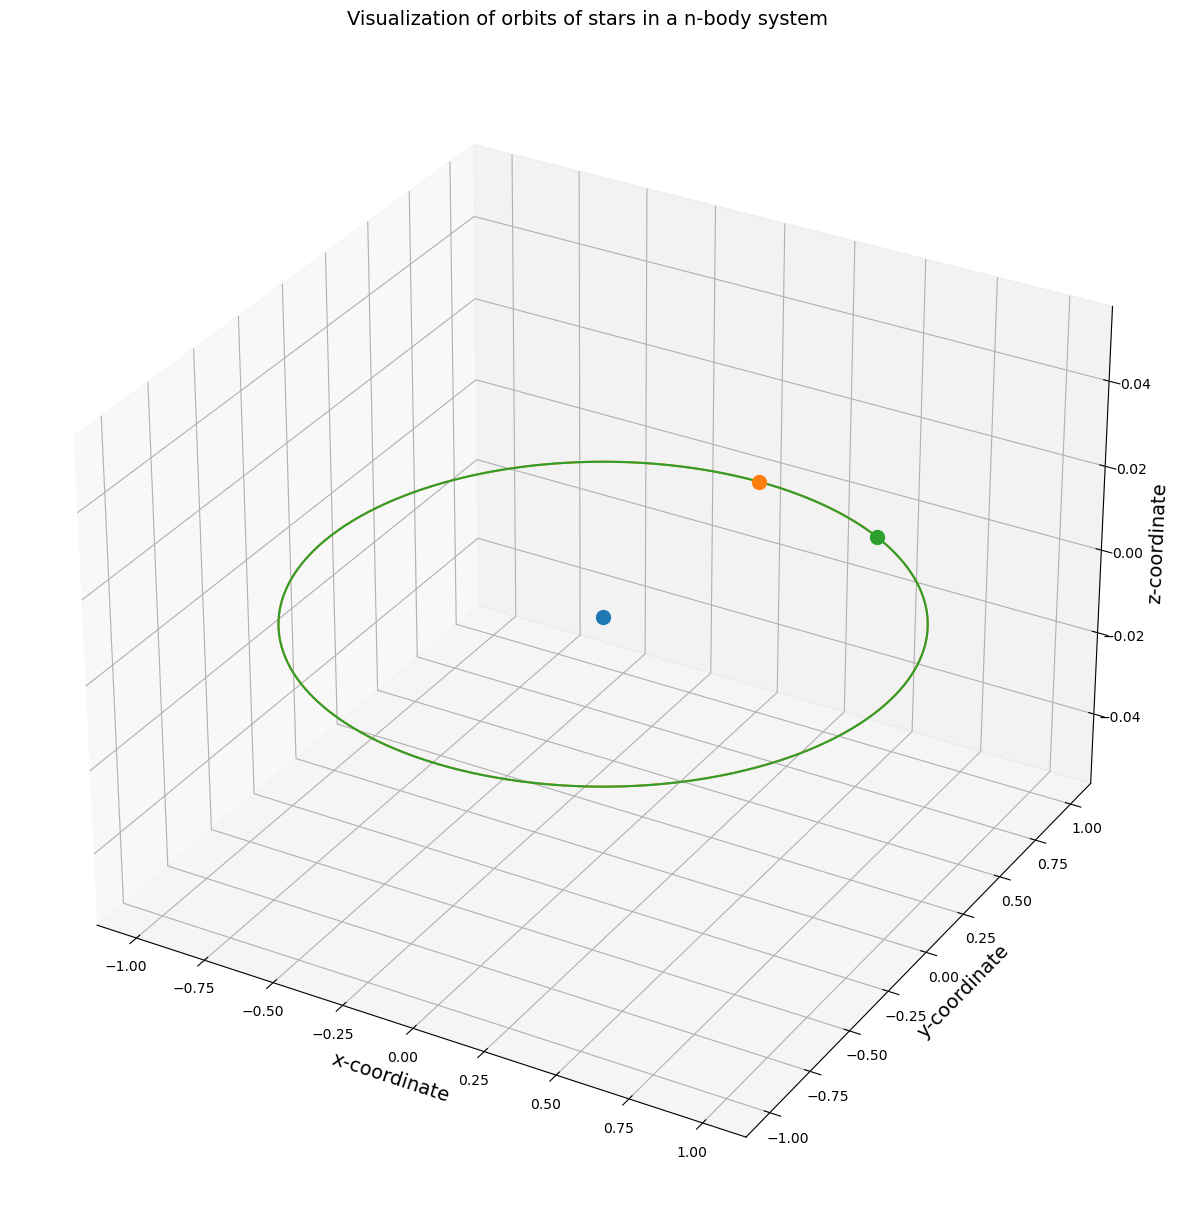

In [18]:
r = np.array([[0, 0, 0],
              [0, 1, 0],
              [np.cos(np.pi/3), np.sin(np.pi/3), 0]], dtype="float64")

v = np.array([[0, 0, 0],
              [1, 0, 0],
              [np.sin(2*np.pi/3)+0.0001, -np.cos(np.pi/3), 0]], dtype="float64")

m = np.array([m_Sun, m_Earth, 1000]) / m_Sun

time_span=np.linspace(0, 1, 500)

orbits = nbody(r, v, m, time_span)
plot_orbits(orbits)

# Sympletic Leapfrog Integration

In [19]:
class Body:
    def __init__(self, mass, position, velocity):
        self.mass = mass
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)

def calculate_gravitational_force(body1, body2):
    G = 6.67430e-11
    r = body2.position - body1.position
    distance = np.linalg.norm(r)
    force_magnitude = G * body1.mass * body2.mass / distance**2
    force = force_magnitude * r / distance
    return force

def update_bodies(bodies, dt):
    for body in bodies:
        acceleration = np.zeros_like(body.position, dtype=float)
        for other_body in bodies:
            if other_body != body:
                force = calculate_gravitational_force(body, other_body)
                acceleration += force / body.mass
        body.velocity += 0.5 * dt * acceleration
        body.position += dt * body.velocity
        acceleration = np.zeros_like(body.position, dtype=float)
        for other_body in bodies:
            if other_body != body:
                force = calculate_gravitational_force(body, other_body)
                acceleration += force / body.mass
        body.velocity += 0.5 * dt * acceleration

def simulate_n_bodies(bodies, dt, num_steps):
    num_bodies = len(bodies)
    positions = np.zeros((num_steps, num_bodies, 3), dtype=float)
    
    for step in range(num_steps):
        for i, body in enumerate(bodies):
            positions[step, i] = body.position
        update_bodies(bodies, dt)
    
    return positions



def plot_n_body(positions):
# Plotting the n-bodies in 3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  for i in range(len(bodies)):
      x = positions[:, i, 0]
      y = positions[:, i, 1]
      z = positions[:, i, 2]

      ax.plot(x,y,z)
      size = (bodies[i].mass)**(1/15)
      ax.scatter(x[-1], y[-1], z[-1], marker="o", s=size)


  ax.set_xlabel('X position')
  ax.set_ylabel('Y position')
  ax.set_zlabel('Z position')
  ax.set_title('Celestial Motion')
  plt.show()

## Inner Planets

Sun & Earth System

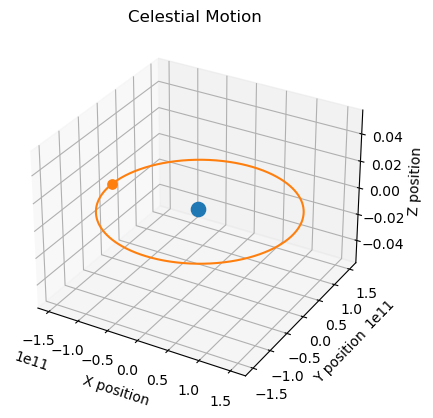

In [20]:
# Define the bodies
sun = Body(1.9891e30, [0, 0, 0], [0, 0, 0])
earth = Body(5.972e24, [-1.4710e11, 0, 0], [0, -3.0287e4, 0])
bodies = [sun, earth]

# Simulate the motion of n-bodies
dt = 3600
num_steps = 8760
positions = simulate_n_bodies(bodies, dt, num_steps)

plot_n_body(positions)
#SUN EARTH SYSTEM

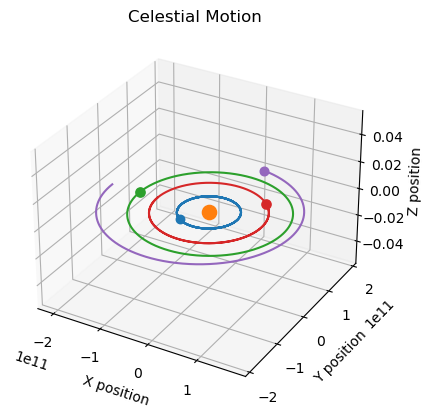

In [21]:
mercury = Body(3.3011e23,[-5.791e10,0,0],[0,-4.787e4,0])
venus= Body(4.8675e24,[-1.0821e11,0,0],[0,-3.502e4,0])
mars = Body(6.4171e23,[-2.0663e11,0,0],[0,-2.4077e4,0])
bodies = [mercury,sun,earth,venus,mars]

dt = 3600
num_steps = 8760

positions = simulate_n_bodies(bodies, dt, num_steps)
plot_n_body(positions)
#INNER PLANETS SYSTEM

Outer Planets (Scrapped due too many space variance)

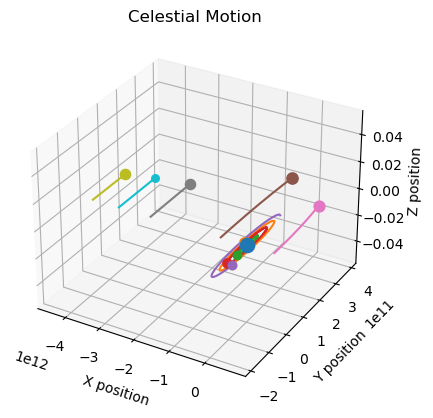

In [22]:
jupiter = Body(1.8982e27,[-7.4052e11,0,0],[0,1.3071e4,0])
saturn = Body(5.6834e26,[7.4052e11,0,0],[0,9.6724e3,0])
uranus = Body(8.6810e25, [-2.7413e12, 0, 0], [0, 6.8351e3, 0])
neptune = Body(1.02413e26, [-4.4445e12, 0, 0], [0, 5.4778e3, 0])
pluto = Body(1.303e22, [-3.6725e12, 0, 0], [0, 6.1159e3, 0])

bodies = [sun,earth,mercury,venus,mars,jupiter,saturn,uranus,neptune,pluto]

dt=3600
num_steps = 8670

positions = simulate_n_bodies(bodies, dt, num_steps)
plot_n_body(positions)

#ALL PLANETS

Two Moons

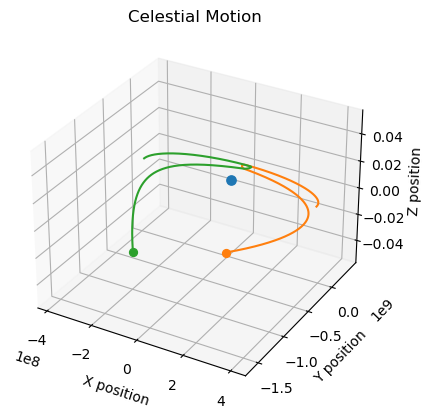

In [23]:
earth_main = Body(5.972e24,[0,0,0],[0,0,0])
moon = Body(7.348e22/2, [3.844e8, 0,0], [0, 1022, 0])
moon2 = Body(7.348e22/2, [-3.844e8, 0,0], [0, 1022, 0])
bodies = [earth_main,moon,moon2]
dt=1800
num_steps=1310
positions = simulate_n_bodies(bodies, dt, num_steps)
plot_n_body(positions)
#TWO MOONS

Double Mass of the Sun

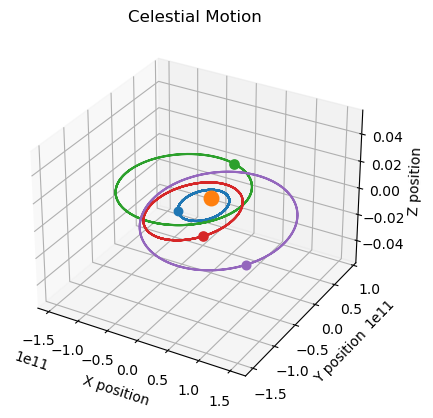

In [24]:
double_sun = Body(1.9891e30*2, [0, 0, 0], [0, 0, 0])

dt = 3600
num_steps = 8760

bodies = [mercury,double_sun,earth,venus,mars]
positions = simulate_n_bodies(bodies, dt, num_steps)
plot_n_body(positions)

#DOUBLE MASS SUN

Half Mass of the Sun

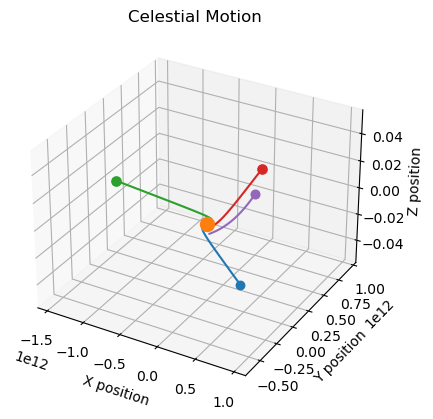

In [25]:
half_sun = Body(1.9891e30*.5, [0, 0, 0], [0, 0, 0])

dt = 3600
num_steps = 8760

bodies = [mercury,half_sun,earth,venus,mars]
positions = simulate_n_bodies(bodies, dt, num_steps)
plot_n_body(positions)